In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold

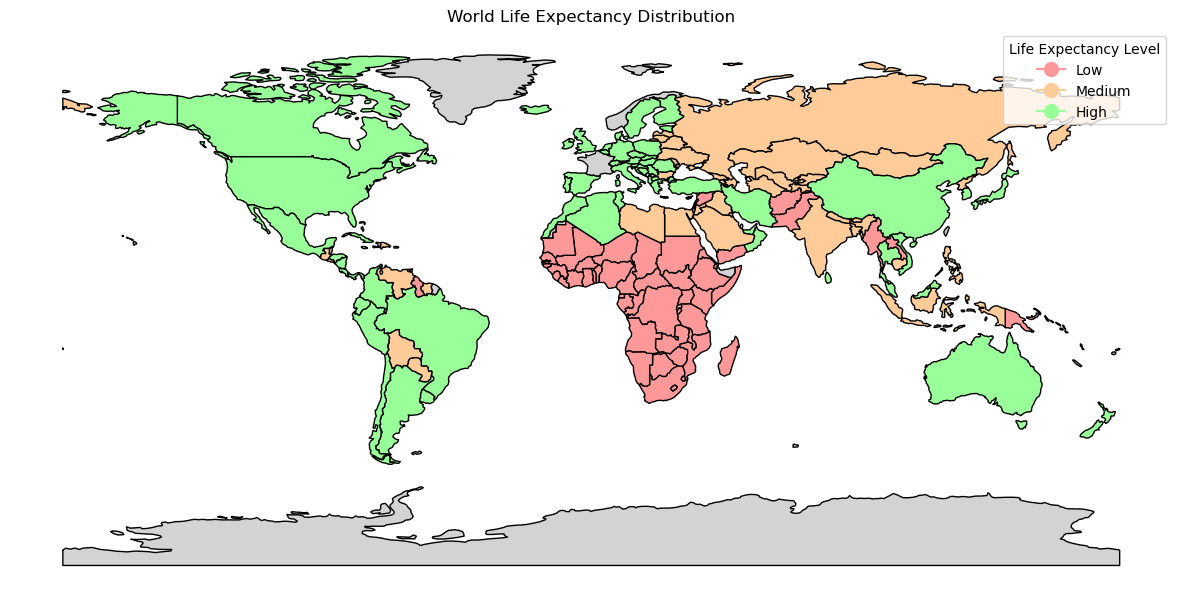

In [ ]:
#--------------------------------------------Prosessing--------------------------------------------#

# 1. Read life expectancy data
life_df = pd.read_csv('life.csv')

# 2. Get world map data
world = gpd.read_file('110m_cultural/ne_110m_admin_0_countries.shp')

# Rename 'ISO_A3' to match
world = world.rename(columns={'ISO_A3': 'CountryCode'})

# 3. Data Merge
merged = world.merge(life_df, on='CountryCode', how='left')

# 4. Mapping
# Defining a Color Map
life_levels = ['Low', 'Medium', 'High']
colors = ['#ff9999', '#ffcc99', '#99ff99']
color_map = dict(zip(life_levels, colors))

# Assign colors to each level, handle NaN values
merged['Color'] = merged['Life expectancy at birth (years)'].map(color_map)
merged['Color'] = merged['Color'].fillna('#d3d3d3') 

# Mapping
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(ax=ax, color=merged['Color'], edgecolor='black')

# Add legends
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color=color, label=level, markersize=10)
                   for level, color in color_map.items()]
ax.legend(handles=legend_elements, title='Life Expectancy Level')

# Set Title
ax.set_title('World Life Expectancy Distribution')

# Remove the coordinate axis
ax.axis('off')

plt.show()

In [3]:
world_df = pd.read_csv('world.csv')
life_df = pd.read_csv('life.csv')

world_df['Year'] = world_df['Year'].astype(str)
life_df['Year'] = life_df['Year'].astype(str)
#Merge two datasets 
merged_df=pd.merge(world_df, life_df, on=['CountryName','CountryCode','Year'])  
merged_df.sort_values(by=['CountryName'], inplace=True)
merged_df.dropna(subset=['CountryName'],inplace=True)

X=merged_df.drop(columns=['CountryName','CountryCode','Year','Life expectancy at birth (years)'])
y=merged_df['Life expectancy at birth (years)']
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)  
#impute missing values
X_train=X_train.replace('..',np.nan)
X_test=X_test.replace('..',np.nan)  
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
#scale features
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [4]:
#--------------------------------------------Task A--------------------------------------------#

#training of K-NN 
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_3.fit(X_train_scaled, y_train)
knn_7.fit(X_train_scaled, y_train)
#training of Decision Tree
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(X_train_scaled, y_train)
#test the classifiers
y_pred_knn_3 = knn_3.predict(X_test_scaled)
y_pred_knn_7 = knn_7.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test_scaled)

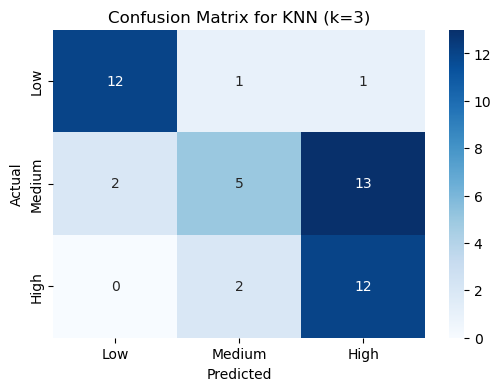

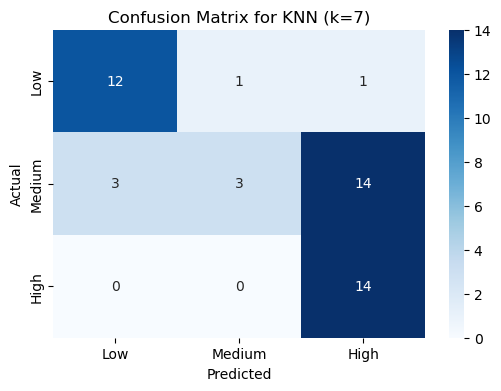

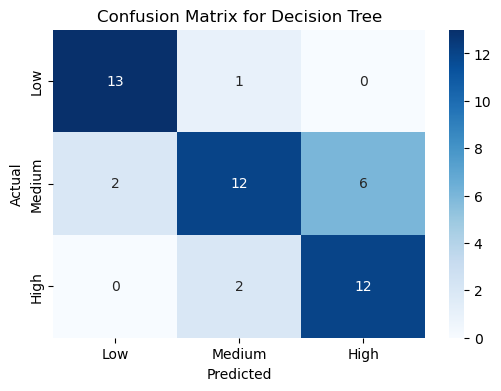

The accuracy of k-NN (k=3):0.6041666666666666
The accuracy of k-NN (k=7):0.6041666666666666
The accuracy of Decision Tree:0.7708333333333334


In [5]:

# calculate confusion matrix
conf_matrix_knn_3 = confusion_matrix(y_test, y_pred_knn_3, labels=['Low', 'Medium', 'High'])
conf_matrix_knn_7 = confusion_matrix(y_test, y_pred_knn_7, labels=['Low', 'Medium', 'High'])
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt, labels=['Low', 'Medium', 'High'])
# draw confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix,annot=True,cmap='Blues',xticklabels=['Low','Medium','High'],yticklabels=['Low','Medium','High'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()
plot_confusion_matrix(conf_matrix_knn_3, 'Confusion Matrix for KNN (k=3)')
plot_confusion_matrix(conf_matrix_knn_7, 'Confusion Matrix for KNN (k=7)')
plot_confusion_matrix(conf_matrix_dt, 'Confusion Matrix for Decision Tree')
#calculate the accuracies
accuracy_knn_3 = accuracy_score(y_test, y_pred_knn_3)
accuracy_knn_7 = accuracy_score(y_test, y_pred_knn_7)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'The accuracy of k-NN (k=3):{accuracy_knn_3}')
print(f'The accuracy of k-NN (k=7):{accuracy_knn_7}')
print(f'The accuracy of Decision Tree:{accuracy_dt}')

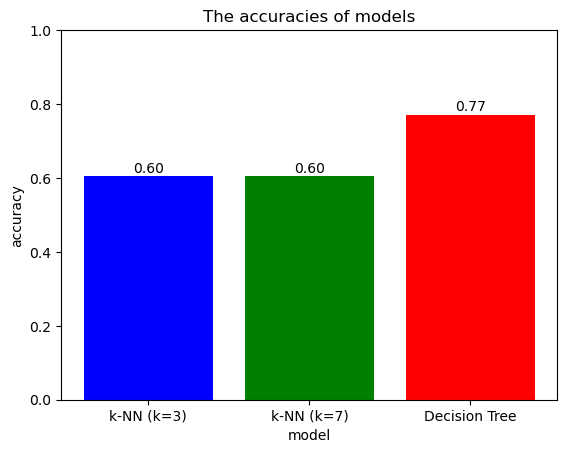

In [6]:
# Accuracy results
accuracies = [accuracy_knn_3, accuracy_knn_7, accuracy_dt]
# Model Name
models = ['k-NN (k=3)', 'k-NN (k=7)', 'Decision Tree']

# Draw a bar chart
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('model')
plt.ylabel('accuracy')
plt.title('The accuracies of models')
plt.ylim(0, 1)  # Set the range of the y-axis, the accuracy is between 0 and 1
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center')  # Display accuracy values ​​on each bar

plt.show()

We can see from the PCA 2D graph in Task B that Medium has a large overlap with the other two parts, which also explains why the accuracy of Medium in the k-nn model is generally low.

KNN (k=1) Accuracy: 0.6250
KNN (k=2) Accuracy: 0.5833
KNN (k=3) Accuracy: 0.6042
KNN (k=4) Accuracy: 0.6458
KNN (k=5) Accuracy: 0.6042
KNN (k=6) Accuracy: 0.6042
KNN (k=7) Accuracy: 0.6042
KNN (k=8) Accuracy: 0.5833
KNN (k=9) Accuracy: 0.6042
KNN (k=10) Accuracy: 0.6042
KNN (k=11) Accuracy: 0.6250


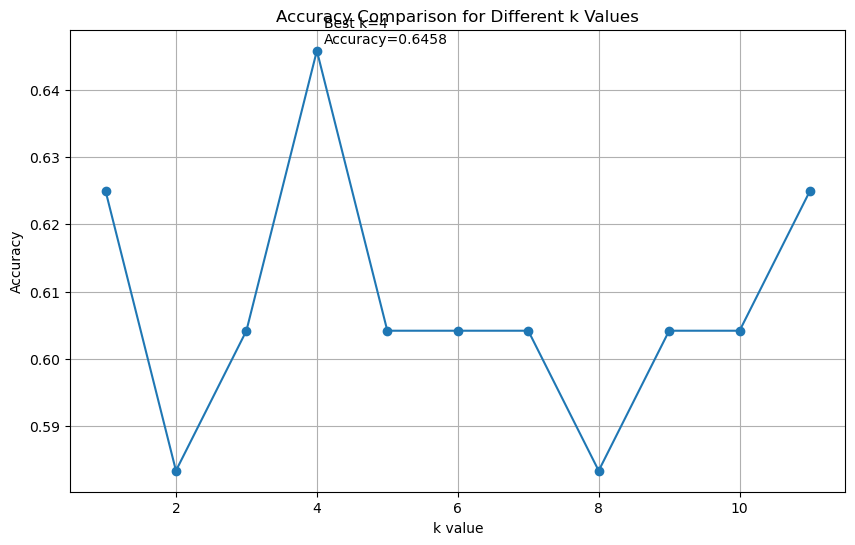


最佳k值为: 4
最佳准确率: 0.6458


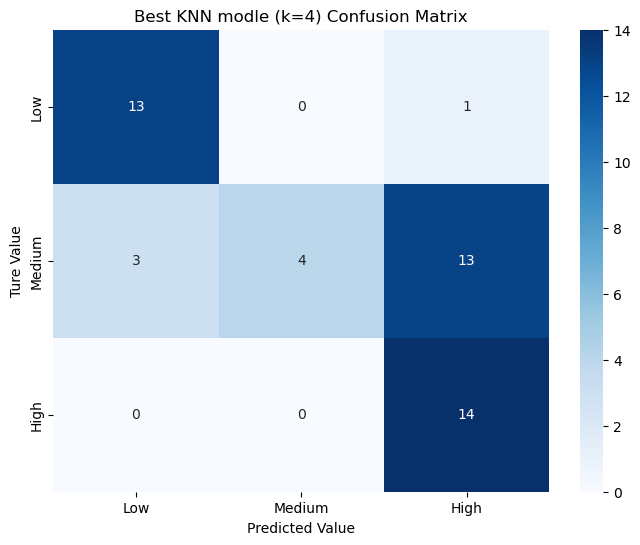

In [ ]:
def train_multiple_knn(X_train, X_test, y_train, y_test, k_values):
    accuracies = {}
    models = {}
    
    for k in k_values:
        # Create and train model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        # Predict and calculate accuracy
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results
        accuracies[k] = accuracy
        models[k] = knn
        
        # Print accuracy for each model
        print(f'KNN (k={k}) Accuracy: {accuracy:.4f}')
    
    # Visualize accuracies for different k values
    plt.figure(figsize=(10, 6))
    plt.plot(list(accuracies.keys()), list(accuracies.values()), 'o-')
    plt.xlabel('k value')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison for Different k Values')
    plt.grid(True)
    
    # Add best k annotation
    best_k = max(accuracies, key=accuracies.get)
    best_acc = accuracies[best_k]
    plt.annotate(f'Best k={best_k}\nAccuracy={best_acc:.4f}',
                xy=(best_k, best_acc),
                xytext=(5, 5),
                textcoords='offset points')
    
    plt.show()
    
    return accuracies, models

k_values = [1,2, 3, 4,5,6, 7, 8,9, 10,11]
accuracies, models = train_multiple_knn(X_train_scaled, 
                                      X_test_scaled, 
                                      y_train, 
                                      y_test, 
                                      k_values)

# Find the best k value
best_k = max(accuracies, key=accuracies.get)
print(f'\nBest k: {best_k}')
print(f'Best accuracy: {accuracies[best_k]:.4f}')

# Draw the confusion matrix of the best model
best_model = models[best_k]
y_pred_best = best_model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred_best, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True, 
            cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted Value')
plt.ylabel('Ture Value')
plt.title(f'Best KNN modle (k={best_k}) Confusion Matrix')
plt.show()

In [ ]:
## Define parameter grid
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
# Create a GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=100), 
                              param_grid=param_grid_rf, 
                              cv=3, verbose=1, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)
# Best parameters and best score
print("Random Forest-Best Parameters:",grid_search_rf.best_params_)
print("Random Forest-Best cross-validation score:{:.2f}".format(grid_search_rf.best_score_))
# Evaluate on the test set
best_rf = grid_search_rf.best_estimator_
final_predictions_rf = best_rf.predict(X_test_scaled)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, final_predictions_rf))

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
#Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
#Get the best model
xgb_model = XGBClassifier(eval_metric='mlogloss')
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train_encoded)
#Output the best parameters and accuracy
print(f'Best Parameters:{grid_search.best_params_}')
print(f'Best Accuracy:{grid_search.best_score_}')
#Train the best model
best_xgb=grid_search.best_estimator_
best_xgb.fit(X_train_scaled, y_train_encoded)
#Predict the test set
y_pred_xgb = best_xgb.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print(f'Tuned XGBoost Accuracy:{accuracy_xgb}')


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Random Forest-Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest-Best cross-validation score:0.76
Tuned Random Forest Accuracy: 0.7291666666666666
Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters:{'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}
Best Accuracy:0.755005005005005
Tuned XGBoost Accuracy:0.75


From the above, we can see that a single classifier has its limits, so we can try to combine multiple classifiers

Voting Classifier 

1. Working principle:

Combining multiple basic classifiers

Each classifier predicts independently

The final result is obtained by voting

2. Voting method:

hard: majority voting

soft: weighted probability average

accuracy of XGBoost:0.7288888888888889
accuracy of Random Forest:0.7466666666666667
accuracy of Voting Classifier:0.7888888888888889


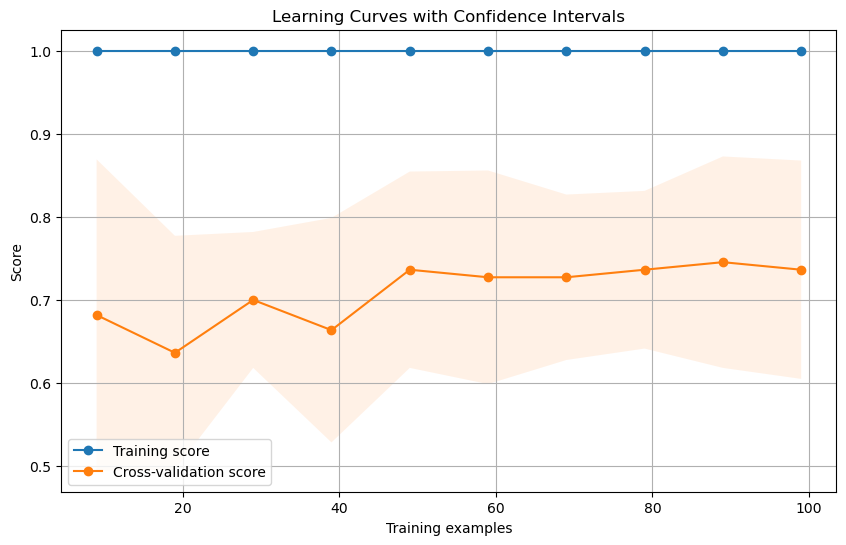

In [27]:


# Create basic Classifiers
clf1 = RandomForestClassifier(max_depth=4) 
clf2 = GradientBoostingClassifier(max_depth=3)
clf3 = SVC(probability=True)

clf1.fit(X_train_scaled, y_train_encoded)
clf2.fit(X_train_scaled, y_train_encoded)
clf3.fit(X_train_scaled, y_train_encoded)

# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('rf', clf1), ('gb', clf2), ('svc', clf3)],
    voting='soft'
)

# k-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(best_xgb, X_test_scaled, y_test_encoded, cv=kf)
print(f'accuracy of XGBoost:{scores.mean()}')

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(best_rf, X_test_scaled, y_test_encoded, cv=kf)
print(f'accuracy of Random Forest:{scores.mean()}')

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(voting_clf, X_test_scaled, y_test_encoded, cv=kf)
print(f'accuracy of Voting Classifier:{scores.mean()}')

# Define the stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Draw learning curve
def plot_detailed_learning_curve(estimator, X, y):
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, 
        cv=skf,
        n_jobs=-1,
        train_sizes=train_sizes,
        scoring='accuracy'
    )
    
    plt.figure(figsize=(10,6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
    plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', label="Cross-validation score")
    plt.fill_between(train_sizes, 
                     np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                     np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), 
                     alpha=0.1)
    plt.fill_between(train_sizes, 
                     np.mean(val_scores, axis=1) - np.std(val_scores, axis=1),
                     np.mean(val_scores, axis=1) + np.std(val_scores, axis=1), 
                     alpha=0.1)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title("Learning Curves with Confidence Intervals")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

plot_detailed_learning_curve(voting_clf, X_train_scaled, y_train_encoded)

1. Training Score

Represents the performance of the model on the training data

Reflects the degree of fit of the model to the known data

If the training score is high but the cross-validation score is low, it means that the model may be overfitting

2. Cross-validation Score 

Represents the performance of the model on the validation data

Reflects the generalization ability of the model

It can better explain the expected performance of the model in practical applications

3. Relationship analysis between the two 
Common situations:

Ideal situation:
The two curves are close;
The scores are both high;
Indicates that the model is both well-fitted and has good generalization ability;

Overfitting situation:
Training score is very high;
Cross-validation score is significantly lower;
Indicates that the model has over-memorized the training data;

Underfitting situation:
Both scores are low;
The two curves are relatively close;
Indicates that the model is not capable enough

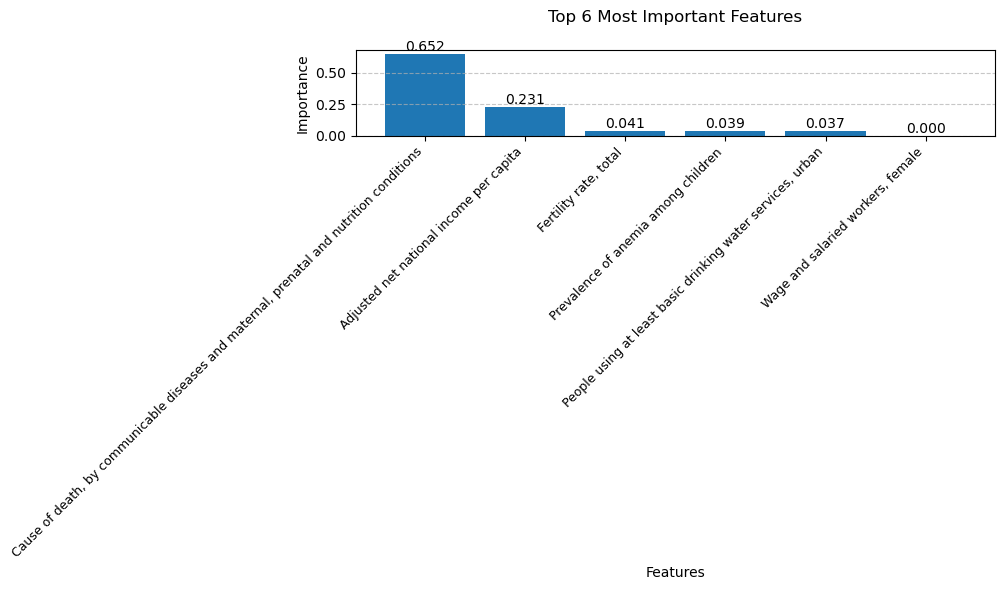

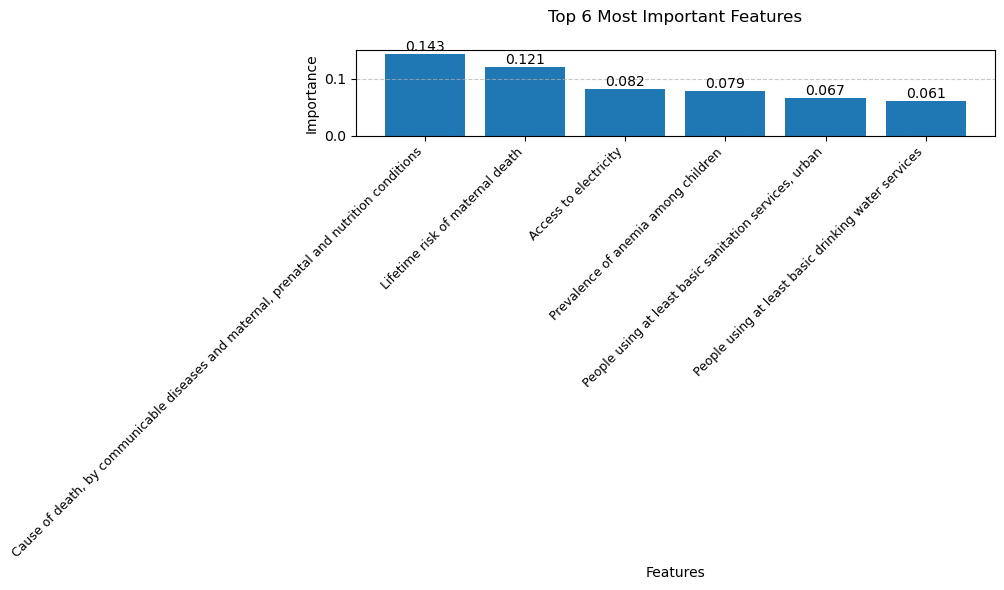

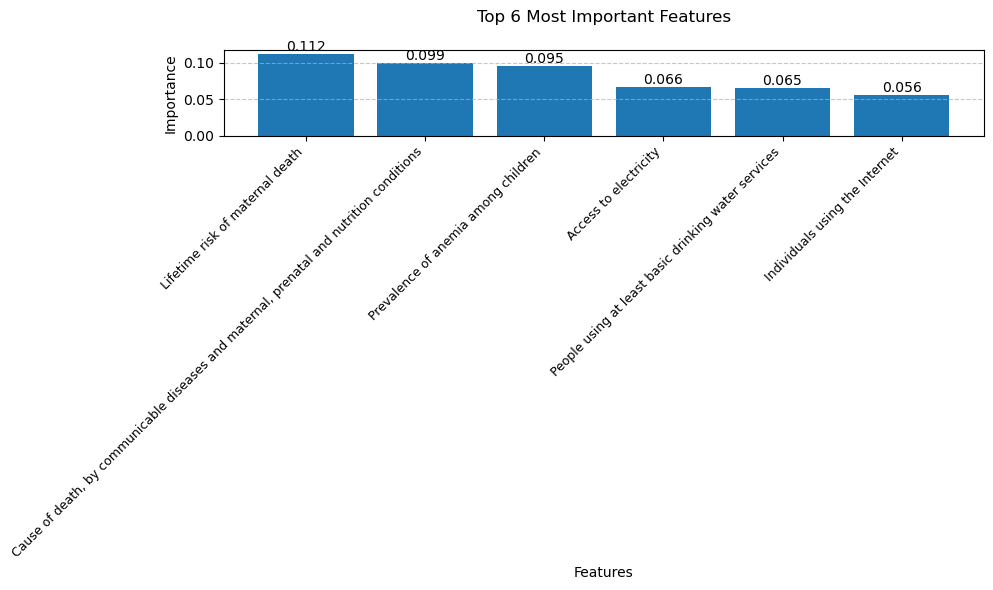

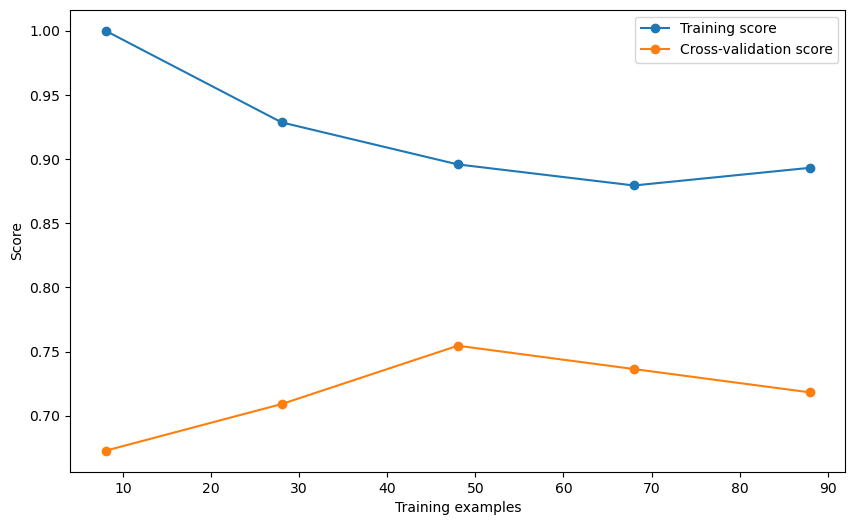

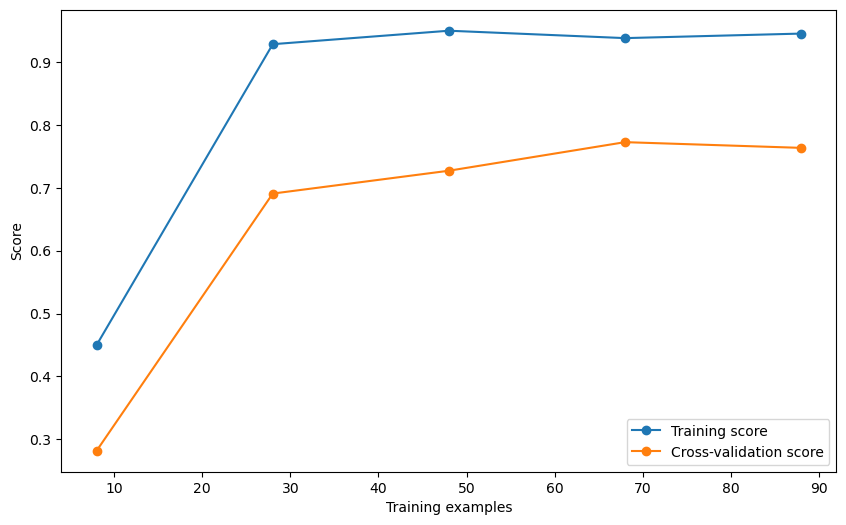

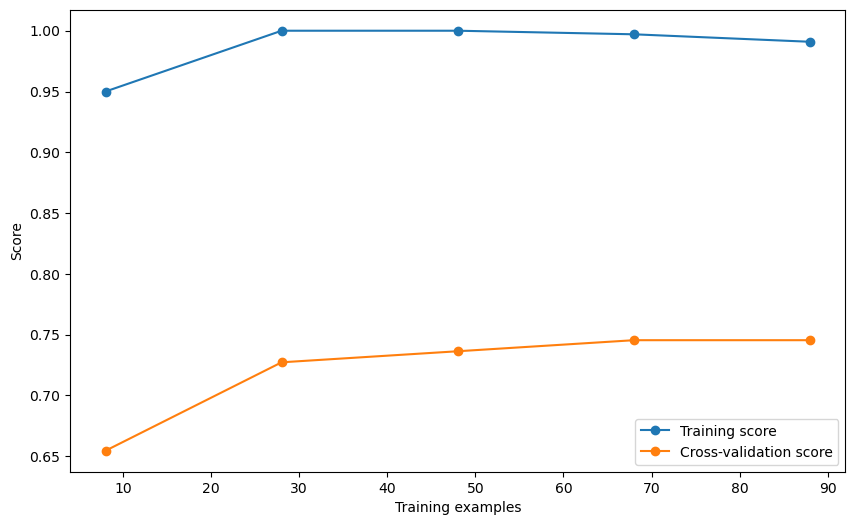

In [19]:
# Function to clean feature names
def clean_feature_name(name):
    # Remove the contents in square brackets [] and parentheses ()
    import re
    cleaned = re.sub(r'\[.*?\]', '', name)  # Remove the contents in square brackets
    cleaned = re.sub(r'\(.*?\)', '', cleaned)  # Remove the contents in parentheses
    return cleaned.strip()  # Remove extra spaces

# Feature importance visualization
def plot_feature_importance(model, features, top_n=6):
    # Show only the top N most important features
    importances = model.feature_importances_
    indices = np.argsort(importances)[:-(top_n+1):-1]  # Get the index of the top_n features
    
    plt.figure(figsize=(10, 6))
    
    # Plot the importance of the top_n features
    bars = plt.bar(range(top_n), importances[indices])
    
    plt.title(f"Top {top_n} Most Important Features", fontsize=12, pad=20)
    plt.xlabel("Features", fontsize=10)
    plt.ylabel("Importance", fontsize=10)
    
    # Set x-axis label
    plt.xticks(range(top_n), 
               [clean_feature_name(features[i]) for i in indices],
               rotation=45,
               ha='right',
               fontsize=9)
    
    # Add specific values ​​to the column
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Function to plot learning curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(.1, 1.0, 5))
    
    plt.figure(figsize=(10,6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
    plt.plot(train_sizes, np.mean(val_scores, axis=1), 'o-', label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.show()

plot_feature_importance(dt, X.columns) #Feature importance of decision tree
plot_feature_importance(best_rf, X.columns) #Feature importance of Random Forest
plot_feature_importance(best_xgb, X.columns) #Feature importance of XGBoost
plot_learning_curve(dt, X_train_scaled, y_train) #Decision tree learning curve
plot_learning_curve(best_rf, X_train_scaled, y_train) #Random Forest learning curve
plot_learning_curve(best_xgb, X_train_scaled, y_train_encoded) #XGBoost learning curve

In [21]:
#--------------------------------------------Task B--------------------------------------------#

#20 original features
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
# Generate 190 interaction term features
def generate_interaction_terms(df):
    interactions = {}
    
    for i in range(df.shape[1]):
        for j in range(i+1, df.shape[1]):
            col_name = f'interaction_{i}_{j}'
            interactions[col_name] = df.iloc[:, i] * df.iloc[:, j]
    
    # Convert the dictionary to a DataFrame
    return pd.DataFrame(interactions, index=df.index)

interaction_terms = generate_interaction_terms(pd.DataFrame(X_train_scaled))
interaction_terms_test = generate_interaction_terms(pd.DataFrame(X_test_scaled))
#Generate 1 feature by kmeans clustering
kmeans = KMeans(n_clusters=3, random_state=200)  
cluster_labels_train = kmeans.fit_predict(X_train_scaled)
cluster_labels_test=kmeans.predict(X_test_scaled)
cluster_labels_train=pd.DataFrame(cluster_labels_train,columns=['cluster_label'])
cluster_labels_test=pd.DataFrame(cluster_labels_test,columns=['cluster_label'])
#merge 211 features to extend the training and test set
X_train_extended=pd.concat([X_train_scaled_df,interaction_terms,cluster_labels_train],axis=1)
X_test_extended=pd.concat([X_test_scaled_df,interaction_terms_test,cluster_labels_test],axis=1)

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
#select 4 features by SelectKBest
selector = SelectKBest(f_classif, k=4)
X_train_select4best = selector.fit_transform(X_train_extended, y_train)
X_test_select4best = selector.transform(X_test_extended)
knn_3_select4best = KNeighborsClassifier(n_neighbors=3)
knn_3_select4best.fit(X_train_select4best, y_train)
y_pred_knn_3_select4best = knn_3_select4best.predict(X_test_select4best)
accuracy_knn_3_select4best = accuracy_score(y_test, y_pred_knn_3_select4best)
print(f'The accuracy of selecting 4 features by SelectKBest:{accuracy_knn_3_select4best}')

#select via PCA by taking the first four principal components.
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_extended)
X_test_pca = pca.transform(X_test_extended)
knn_3_pca = KNeighborsClassifier(n_neighbors=3)
knn_3_pca.fit(X_train_pca, y_train)
y_pred_knn_3_pca = knn_3_pca.predict(X_test_pca)
accuracy_knn_3_pca = accuracy_score(y_test, y_pred_knn_3_pca)
print(f'The accuracy of selecting via PCA:{accuracy_knn_3_pca}')

#Take the first four features from the original dataset
X_train_top4 = X_train_scaled_df.iloc[:, :4]
X_test_top4 = X_test_scaled_df.iloc[:, :4]
knn_3_top4 = KNeighborsClassifier(n_neighbors=3)
knn_3_top4.fit(X_train_top4, y_train)
y_pred_knn_3_top4 = knn_3_top4.predict(X_test_top4)
accuracy_knn_3_top4 = accuracy_score(y_test, y_pred_knn_3_top4)
print(f'The accuracy of first four features from original dataset:{accuracy_knn_3_top4}')

#Next is Decision Tree
dt_select4best = DecisionTreeClassifier(max_depth=4)
dt_select4best.fit(X_train_select4best, y_train)
y_pred_dt_select4best = dt_select4best.predict(X_test_select4best)
accuracy_dt_select4best = accuracy_score(y_test, y_pred_dt_select4best)
print(f'The accuracy of Decision Tree selecting 4 features by SelectKBest:{accuracy_dt_select4best}')

dt_pca = DecisionTreeClassifier(max_depth=4)
dt_pca.fit(X_train_pca, y_train)
y_pred_dt_pca = dt_pca.predict(X_test_pca)
accuracy_dt_pca = accuracy_score(y_test, y_pred_dt_pca)
print(f'The accuracy of Decision Tree selecting via PCA:{accuracy_dt_pca}')

dt_top4 = DecisionTreeClassifier(max_depth=4)
dt_top4.fit(X_train_top4, y_train)
y_pred_dt_top4 = dt_top4.predict(X_test_top4)
accuracy_dt_top4 = accuracy_score(y_test, y_pred_dt_top4)
print(f'The accuracy of Decision Tree first four features from original dataset:{accuracy_dt_top4}')

#Print the features selected by SelectKBest
selected_features = X_train_extended.columns[selector.get_support()]
print('Features selected by SelectKBest:')
for feature in selected_features:
    print(clean_feature_name(feature))


The accuracy of selecting 4 features by SelectKBest:0.7083333333333334
The accuracy of selecting via PCA:0.5416666666666666
The accuracy of first four features from original dataset:0.6041666666666666
The accuracy of Decision Tree selecting 4 features by SelectKBest:0.7291666666666666
The accuracy of Decision Tree selecting via PCA:0.5833333333333334
The accuracy of Decision Tree first four features from original dataset:0.625
Features selected by SelectKBest:
Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions
People using at least basic drinking water services
People using at least basic sanitation services, urban
Prevalence of anemia among children


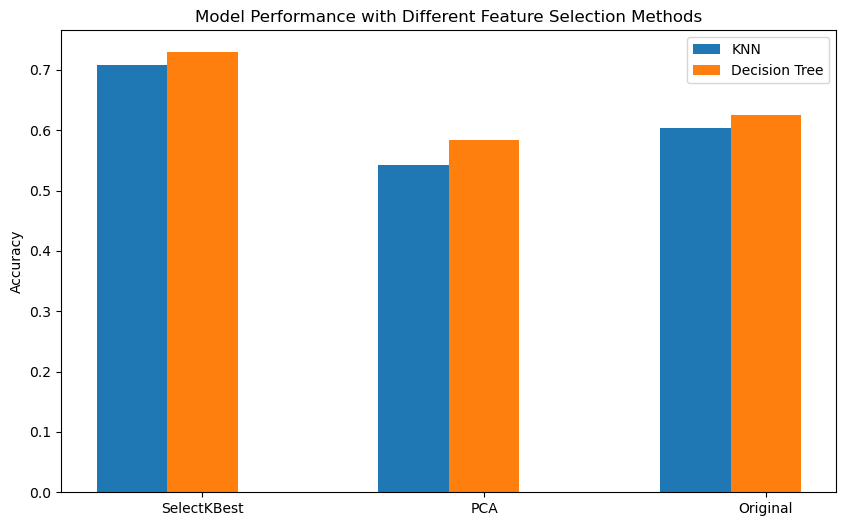

In [23]:
methods = ['SelectKBest', 'PCA', 'Original']
x = np.arange(len(methods))
width = 0.25

knn_accuracy = [accuracy_knn_3_select4best, accuracy_knn_3_pca, accuracy_knn_3_top4]
dt_accuracy = [accuracy_dt_select4best, accuracy_dt_pca, accuracy_dt_top4]

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width, knn_accuracy, width, label='KNN')
rects2 = ax.bar(x, dt_accuracy, width, label='Decision Tree') 

ax.set_ylabel('Accuracy')
ax.set_title('Model Performance with Different Feature Selection Methods')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()

plt.show()

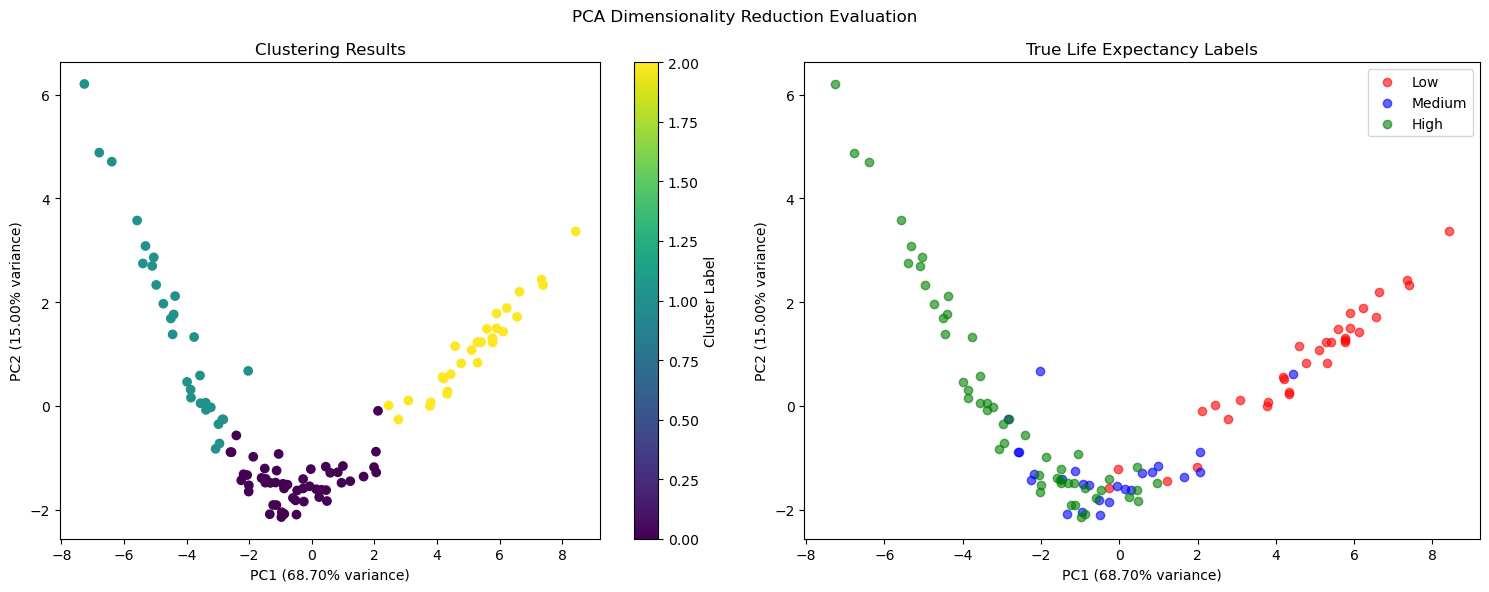

In [24]:
def visualize_clustering_evaluation(X_train_scaled, cluster_labels, y_train, title):
    # Perform PCA dimensionality reduction
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_train_scaled)
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. Show clustering results
    scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], 
                          c=cluster_labels, 
                          cmap='viridis')
    ax1.set_title('Clustering Results')
    ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    plt.colorbar(scatter1, ax=ax1, label='Cluster Label')
    
    # 2. Show true labels
    for label, color in zip(['Low', 'Medium', 'High'], ['red', 'blue', 'green']):
        mask = y_train == label
        ax2.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                   c=color, label=label, alpha=0.6)
    
    ax2.set_title('True Life Expectancy Labels')
    ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    ax2.legend()
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

visualize_clustering_evaluation(X_train_scaled, cluster_labels_train.values.ravel(), y_train, 'PCA Dimensionality Reduction Evaluation')

A good PCA dimensionality reduction effect should be manifested as follows:

High variance explanation rate (the proportion of total variance explained by the two principal components is high);
Clear category separation (points of different colors have obvious boundaries);
The clustering results are highly consistent with the true labels;
Fewer overlapping areas of categories;

Here you can refer to the PCA dimensionality reduction figure above

Cumulative variance explained: [0.43856659 0.74266108 0.78386707 0.81726727]


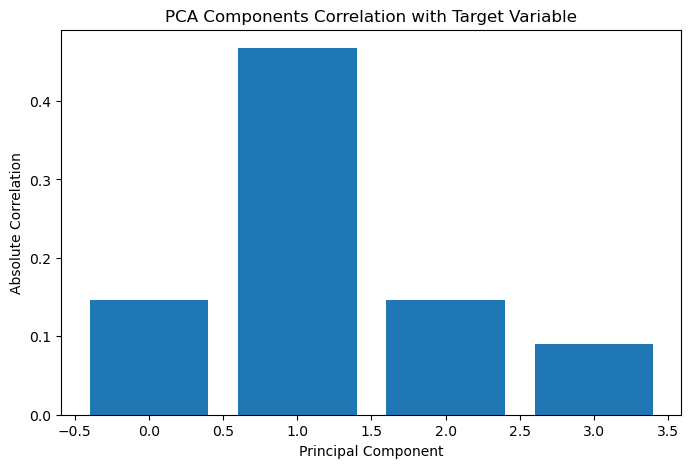

In [26]:
# Analyze the variance explained by PCA
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_extended)
print("Cumulative variance explained:", np.cumsum(pca.explained_variance_ratio_))

# Check the correlation between the features after PCA transformation and the original labels
def analyze_pca_components(X_pca, y, n_components=4):
    correlations = []
    for i in range(n_components):
        correlation = np.corrcoef(X_pca[:, i], pd.get_dummies(y).values[:, 0])[0,1]
        correlations.append(abs(correlation))
    
    plt.figure(figsize=(8, 5))
    plt.bar(range(n_components), correlations)
    plt.title('PCA Components Correlation with Target Variable')
    plt.xlabel('Principal Component')
    plt.ylabel('Absolute Correlation')
    plt.show()

analyze_pca_components(X_train_pca, y_train)

As can be seen from the above figure, PCA has a good dimensionality reduction effect and a high explanation rate, but the correlation between the principal components is generally very low (one is about 0.4, and the other three are about 0.1), so the accuracy of PCA dimensionality reduction is not high.